# 고양이 수염 스티커 만들기
중요 라이브러리 임포트 및 버전 확인

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## 사진 가져와서 bounding box 찾아보기

### 사진 불러온 후 색 영역을 수정하기

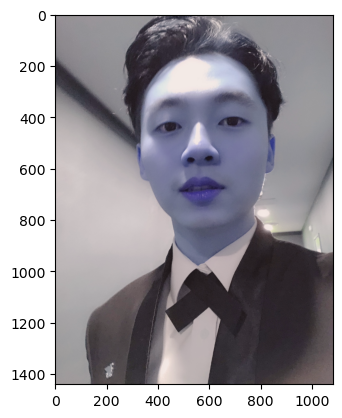

In [2]:
my_image_path = 'camera_sticker/images/self1.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

얼굴이 파란색으로 보이는건 평소에 쓰는 RGB 형식이 아니라 BGR 형식이라 그렇다.  
그러므로 색 영역을 바꿔주어야한다. (BGR -> RGB)

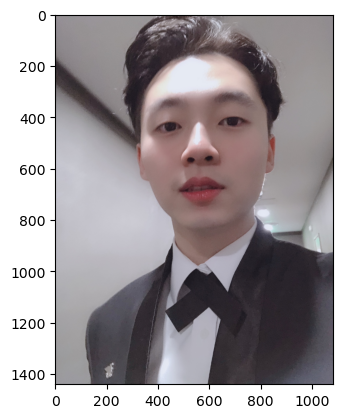

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### dlib 라이브러리의 face detector를 사용해 얼굴 찾기  
HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)이 사용됨  
detector 선언, bounding box(얼굴 영역) 추출하기

In [4]:
detector_hog = dlib.get_frontal_face_detector()      # 디텍터 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)   # 불러온 이미지를 BGR에서 RGB 영역으로 변환
dlib_rects = detector_hog(img_rgb, 1)                # 디텍터에 이미지를 넣어 bounding box 추출

bounding box가 잘 추출되었는지 이미지 출력해보기

rectangles[[(295, 295) (849, 850)]]


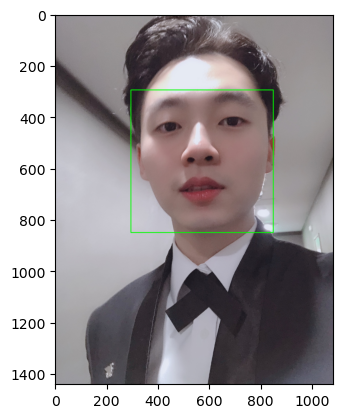

In [5]:
print(dlib_rects)          # 좌상 모서리와 우하 모서리의 좌표

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

사진의 이목구비를 찾아주는 face landmark localization 기술이 적용되었다.  
이제 저 초록색 박스(bounding box) 안에서 landmark를 찾아내는게 목표이다.

--------------

## Bounding box 안에서 Landmark 찾고, 이미지 위에 출력해보기

### Landmark 모델 불러오기

In [6]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [7]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)                 # bounding box 안에서의 랜드마크 위치를 찾게됨
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
print(list_landmarks[0])
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68
[(328, 489), (336, 549), (350, 608), (372, 665), (396, 722), (427, 773), (467, 816), (517, 843), (581, 849), (646, 837), (701, 807), (748, 768), (785, 718), (807, 660), (823, 597), (832, 532), (839, 468), (359, 397), (383, 355), (425, 330), (476, 324), (522, 337), (593, 328), (641, 307), (694, 304), (743, 321), (774, 361), (559, 411), (560, 447), (560, 481), (561, 517), (511, 582), (538, 584), (564, 587), (592, 581), (620, 575), (403, 453), (430, 430), (463, 427), (491, 446), (463, 456), (430, 459), (642, 432), (671, 409), (705, 405), (733, 423), (707, 435), (673, 436), (484, 694), (508, 655), (538, 635), (563, 640), (589, 632), (624, 649), (663, 682), (629, 711), (596, 727), (568, 732), (541, 731), (511, 720), (501, 690), (539, 667), (565, 668), (590, 664), (645, 680), (592, 688), (566, 695), (540, 693)]


### 찾은 Landmark를 이미지 위에 출력하기

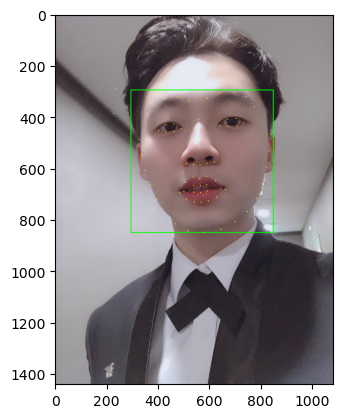

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨(찾은 얼굴이 하나여서 원소가 1임)
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## 고양이 스티커 불러오고 붙이기  
랜드마크 기준으로 코의 중심정도  
코 중심으로 픽셀 위치 조정하기  
얼굴 위치, 카메라 거리에 따라 픽셀값이 변동되니 비율로 계산해야한다.

In [9]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = int(landmark[30][1] - dlib_rect.height()//2.5) # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(561, 517)
(x,y) : (561,295)
(w,h) : (555,555)


코의 중심위치가 (561, 517)로 나타남
다음은 스티커 이미지를 불러온 후 사이즈는 w,h값으로 지정

(555, 555, 3)


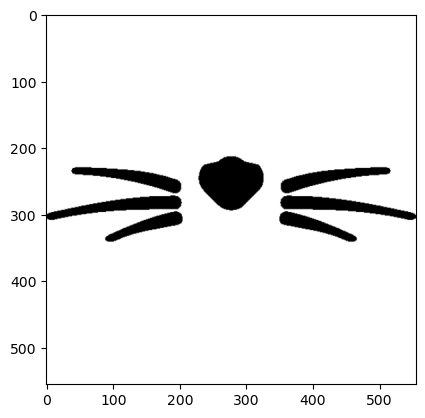

In [10]:
sticker_path = 'camera_sticker/images/cat.png' # 고양이수염 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_COLOR) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(555) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 고양이수염 이미지의 차원 확인
plt.imshow(img_sticker) 
plt.show()

### 원본 이미지에 스티커 이미지 추가  
x, y 좌표 조정 / 이미지 시작지점은 top-left 좌표부터임

In [11]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 561
# y는 이미지에서 코 부위의 y값 = 239
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 555
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 555
refined_x = x - w // 2   # 561 - (555//2) = 561-277 = 284
refined_y = y            # 코 위에 붙이므로 y좌표는 그대로 295
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문
# refined_x, refined_y값에서 스티커 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 

(x,y) : (284,295)


In [12]:
# 만약 스티커 사진이 원본사진 밖으로 나갈 경우에
# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (284,295)


In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

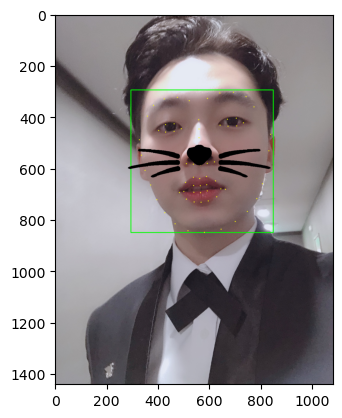

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

처음엔 스티커 이미지가 수염 부분은 투명, 그 외 배경이 하얗게 나오길래 알아보니  
np.where 부분의 img_sticker == 0 으로 된게 색이 없던 부분을 출력하게끔 되어있다보니 나타난 현상이였다,  
그래서 img_sticker != 0 으로 바꾸어 색이 있던 곳만 출력되게 해주었다,

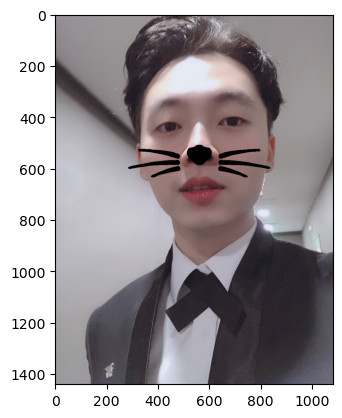

In [17]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()